In [7]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [8]:

from sklearn.model_selection import train_test_split

In [10]:
import pandas as pd
dataset = pd.read_csv('./sample_data/diabetes.csv')

In [11]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]

In [12]:
X_train, X_test, y_train, y_test=train_test_split(dataset.loc[:,dataset.columns!='Outcome'],dataset['Outcome'],test_size=0.25, random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=9, random_state=0)

In [15]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))

Accuracy on training set:0.938


In [17]:
#Overfitting過擬合,樹深度depth 為9

In [18]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.771


In [19]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3, random_state=0)

In [20]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))

Accuracy on training set:0.769


In [22]:
#樹深度depth 為3

In [23]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.745


In [24]:
print("懷孕次數，血糖，血壓，皮脂厚度，胰島素，BMI身體質量指數，糖尿病遺傳函數，年齡:\n{}".format(tree.feature_importances_))

懷孕次數，血糖，血壓，皮脂厚度，胰島素，BMI身體質量指數，糖尿病遺傳函數，年齡:
[0.         0.53008344 0.         0.         0.         0.29377852
 0.01494681 0.16119124]


In [25]:
#決策樹深度為3以血糖造成糖尿病的影響最大,然後是BMI和年齡

In [28]:
diabetes_clf=tree.fit(X_train, y_train)


In [35]:
row=[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [39]:
y_pred = diabetes_clf.predict(X_test)

In [41]:
from sklearn import metrics

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7447916666666666


In [43]:
from sklearn.tree import export_graphviz

In [44]:
from sklearn.externals.six import StringIO 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [45]:
from IPython.display import Image  

In [46]:
import pydotplus

In [57]:
feature_cols = ['pregnant','Glucose','BloddPressure', 'Skin', 'Insulin', 'BMI','DiabetesFunc','Age']

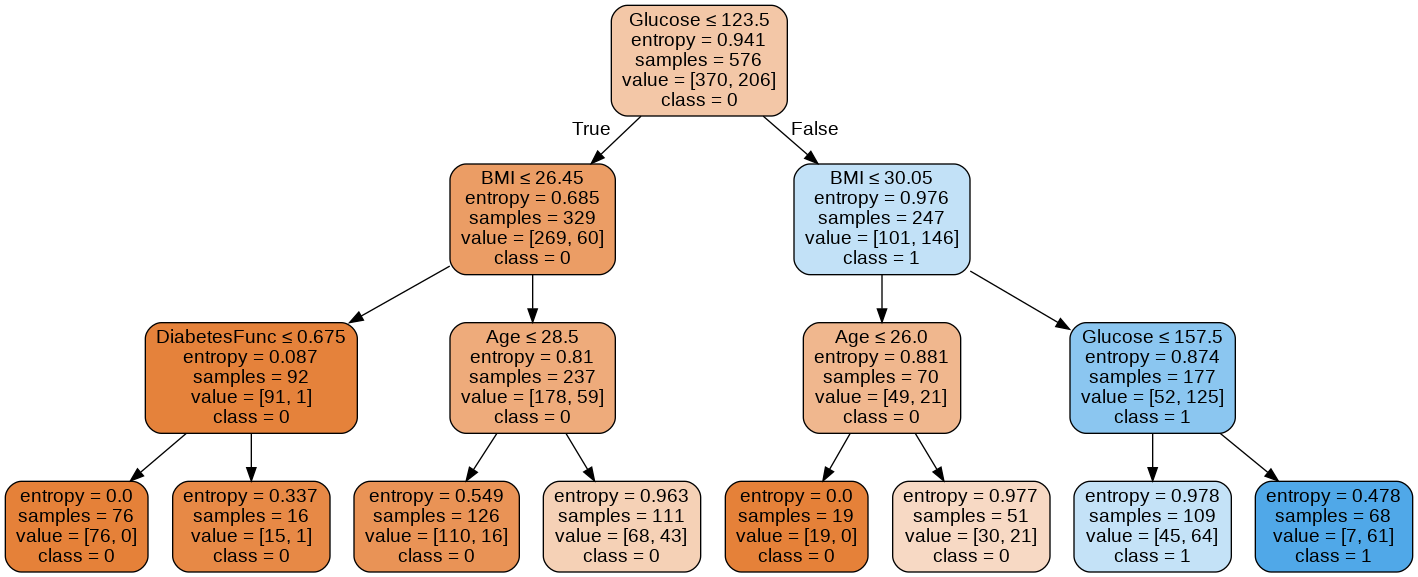

In [58]:
dot_data = StringIO()
export_graphviz(diabetes_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())